
# Poems Classifier
Data Source: https://www.kaggle.com/ultrajack/modern-renaissance-poetry

### The dataset consists of following data:

#Total no. of datapoints: 573
#Number of Attributes/Columns in data: 5
#Number of Authors: 67
#Number of different poems: 506
#Number of different poem names: 509
#Types(genres): 3


### Attribute Information:

#author
#content: Poems
#poem Name
#age: Modern and Renaissance
#type: Genre(Mythology & Folklore,Nature and Love)

Loading the data
The dataset is available in .csv file.



In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [220]:
df=pd.read_csv('poems.csv')

In [221]:
df.shape

(573, 5)

In [223]:
df.rename(columns={'poem name': 'poem_name'}, inplace=True)

In [224]:
print(df.author.unique().shape,
df.content.unique().shape,
df.poem_name.unique().shape)

(67,) (506,) (509,)


In [132]:
df.head(5)

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


# Preprocessing

In [133]:
df=df[df.content.str.contains("Copyright")==False]      #to avoid any copyright issues

In [135]:
df.poem_name.unique().shape

(447,)

In [136]:
df.content.unique().shape

(443,)

In [137]:
df.drop_duplicates()   

,author,content,poem_name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore
5,RICHARD BARNFIELD,"Cherry-lipt Adonis in his snowie shape,\r\n ...",Sonnet 17,Renaissance,Mythology & Folklore
6,SIR WALTER RALEGH,Praisd be Dianas fair and harmless light;\r\nP...,Praisd be Dianas Fair and Harmless Light,Renaissance,Mythology & Folklore
7,QUEEN ELIZABETH I,"When I was fair and young, then favor graced m...",When I Was Fair and Young,Renaissance,Mythology & Folklore
8,JOHN DONNE,"When by thy scorn, O murd'ress, I am dead\r\n ...",The Apparition,Renaissance,Mythology & Folklore
9,JOHN SKELTON,"Pla ce bo,\r\nWho is there, who?\r\nDi le xi,\...",The Book of Phillip Sparrow,Renaissance,Mythology & Folklore


In [138]:
print(df.iloc[0,:])
print(df.iloc[74,:])   #conclusion: Same poem having two different types: Mythology & Folklore and Love

author                                     WILLIAM SHAKESPEARE
content      Let the bird of loudest lay\r\nOn the sole Ara...
poem_name                           The Phoenix and the Turtle
age                                                Renaissance
type                                      Mythology & Folklore
Name: 0, dtype: object
author                                     WILLIAM SHAKESPEARE
content      Let the bird of loudest lay\r\nOn the sole Ara...
poem_name                           The Phoenix and the Turtle
age                                                Renaissance
type                                                      Love
Name: 74, dtype: object


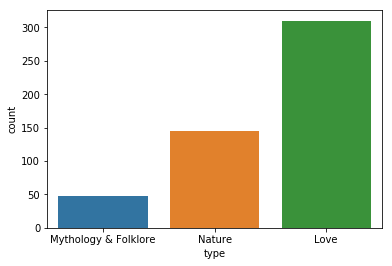

In [139]:
sns.countplot(x='type',data=df)

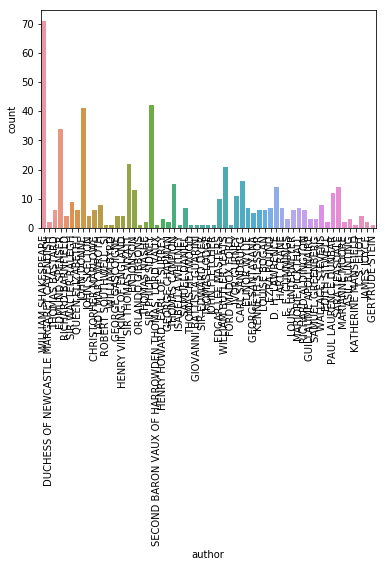

In [140]:
sns.countplot(x='author',data=df)
plt.xticks(rotation=90)
plt.show()

In [141]:
df.isnull().sum()

author       0
content      0
poem_name    2
age          0
type         0
dtype: int64

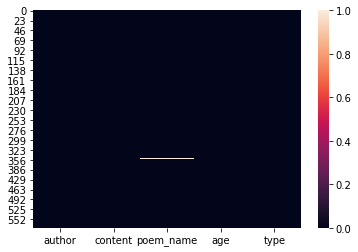

In [142]:
sns.heatmap(df.isnull())

In [143]:
# OR check whether there is any null data 
df[df.content.isnull()==True].index.tolist()

[]

In [144]:
df.dropna(inplace=True)     #drop all null values

In [145]:
df.isnull().sum()

author       0
content      0
poem_name    0
age          0
type         0
dtype: int64

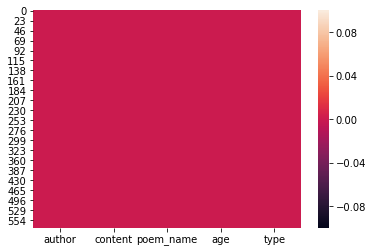

In [146]:
sns.heatmap(df.isnull())

In [147]:
df.content[0]

'Let the bird of loudest lay\r\nOn the sole Arabian tree\r\nHerald sad and trumpet be,\r\nTo whose sound chaste wings obey.\r\n\r\nBut thou shrieking harbinger,\r\nFoul precurrer of the fiend,\r\nAugur of the fever\'s end,\r\nTo this troop come thou not near.\r\n\r\nFrom this session interdict\r\nEvery fowl of tyrant wing,\r\nSave the eagle, feather\'d king;\r\nKeep the obsequy so strict.\r\n\r\nLet the priest in surplice white,\r\nThat defunctive music can,\r\nBe the death-divining swan,\r\nLest the requiem lack his right.\r\n\r\nAnd thou treble-dated crow,\r\nThat thy sable gender mak\'st\r\nWith the breath thou giv\'st and tak\'st,\r\n\'Mongst our mourners shalt thou go.\r\n\r\nHere the anthem doth commence:\r\nLove and constancy is dead;\r\nPhoenix and the Turtle fled\r\nIn a mutual flame from hence.\r\n\r\nSo they lov\'d, as love in twain\r\nHad the essence but in one;\r\nTwo distincts, division none:\r\nNumber there in love was slain.\r\n\r\nHearts remote, yet not asunder;\r\nDis

In [148]:
lin=df.content[0].splitlines()
for li in lin:
    print(li)


Let the bird of loudest lay
On the sole Arabian tree
Herald sad and trumpet be,
To whose sound chaste wings obey.

But thou shrieking harbinger,
Foul precurrer of the fiend,
Augur of the fever's end,
To this troop come thou not near.

From this session interdict
Every fowl of tyrant wing,
Save the eagle, feather'd king;
Keep the obsequy so strict.

Let the priest in surplice white,
That defunctive music can,
Be the death-divining swan,
Lest the requiem lack his right.

And thou treble-dated crow,
That thy sable gender mak'st
With the breath thou giv'st and tak'st,
'Mongst our mourners shalt thou go.

Here the anthem doth commence:
Love and constancy is dead;
Phoenix and the Turtle fled
In a mutual flame from hence.

So they lov'd, as love in twain
Had the essence but in one;
Two distincts, division none:
Number there in love was slain.

Hearts remote, yet not asunder;
Distance and no space was seen
'Twixt this Turtle and his queen:
But in them it were a wonder.

So between them love di

## Convert data into feature

### 1.Turn all the sentence into lower case
### 2.Remove punctuation and Line break
### 3.Remove the word of the list in doc
### 4.Find the word map using tfidfvectorizer library

In [149]:
df.content=df.content.str.lower()

In [150]:
df.poem_name[0]

'The Phoenix and the Turtle'

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 572
Data columns (total 5 columns):
author       501 non-null object
content      501 non-null object
poem_name    501 non-null object
age          501 non-null object
type         501 non-null object
dtypes: object(5)
memory usage: 43.5+ KB


In [152]:
df.content=df.content.str.replace('\n', " ")
df.content=df.content.str.replace("\t", " ")
df.content=df.content.str.replace("\r", " ")
df.content=df.content.str.replace(","," ").replace("."," ")

In [153]:
df.content

0      let the bird of loudest lay  on the sole arabi...
1      sir charles into my chamber coming in   when i...
2      our vice runs beyond all that old men saw   an...
3      lo i the man  whose muse whilome did maske   a...
4      long have i longd to see my love againe   stil...
5      cherry-lipt adonis in his snowie shape       m...
6      praisd be dianas fair and harmless light;  pra...
7      when i was fair and young  then favor graced m...
8      when by thy scorn  o murd'ress  i am dead     ...
9      pla ce bo   who is there  who?  di le xi   dam...
10     ye learned sisters which have oftentimes  been...
11     on hellespont  guilty of true love's blood   i...
12     by that he ended had his ghostly sermon   the ...
13     calm was the day  and through the trembling ai...
14     thenot    &      hobbinoll  tell me good hobbi...
15     pierce       &         cuddie  cuddie  for sha...
16     go and catch a falling star       get with chi...
17     orpheus with his lute ma

In [154]:
remove_list=["A",
"An",
"The",
"Aboard",
"About",
"Above",
"Absent",
"Across",
"After",
"Against",
"Along",
"Alongside",
"Amid",
"Among",
"Amongst",
"Anti",
"Around",
"As",
"At",
"Before",
"Behind",
"Below",
"Beneath",
"Beside",
"Besides",
"Between",
"Beyond",
"But",
"By",
"Circa",
"Concerning",
"Considering",
"Despite",
"Down",
"During",
"Except",
"Excepting",
"Excluding",
"Failing",
"Following",
"For",
"From",
"Given",
"In",
"Inside",
"Into",
"Like",
"Minus",
"Near",
"Of",
"Off",
"On",
"Onto",
"Opposite",
"Outside",
"Over",
"Past",
"Per",
"Plus",
"Regarding",
"Round",
"Save",
"Since",
"Than",
"Through",
"To",
"Toward",
"Towards",
"Under",
"Underneath",
"Unlike",
"Until",
"Up",
"Upon",
"Versus",
"Via",
"With",
"Within",
"Without"]                

In [155]:
for  value in remove_list:
    df.content=df.content.str.replace(value," ")
    

In [156]:
df.content

0      let the bird of loudest lay  on the sole arabi...
1      sir charles into my chamber coming in   when i...
2      our vice runs beyond all that old men saw   an...
3      lo i the man  whose muse whilome did maske   a...
4      long have i longd to see my love againe   stil...
5      cherry-lipt adonis in his snowie shape       m...
6      praisd be dianas fair and harmless light;  pra...
7      when i was fair and young  then favor graced m...
8      when by thy scorn  o murd'ress  i am dead     ...
9      pla ce bo   who is there  who?  di le xi   dam...
10     ye learned sisters which have oftentimes  been...
11     on hellespont  guilty of true love's blood   i...
12     by that he ended had his ghostly sermon   the ...
13     calm was the day  and through the trembling ai...
14     thenot    &      hobbinoll  tell me good hobbi...
15     pierce       &         cuddie  cuddie  for sha...
16     go and catch a falling star       get with chi...
17     orpheus with his lute ma

In [157]:
# regular expression, using stemming: try to replace tail of words like ies to y 
import re

In [158]:
df.content = df.content.str.replace("ing( |$)", " ")
df.content = df.content.str.replace("[^a-zA-Z]", " ")
df.content = df.content.str.replace("ies( |$)", "y ")

In [159]:
df.content[0]

'let the bird of loudest lay  on the sole arabian tree  herald sad and trumpet be   to whose sound chaste wings obey     but thou shriek harbinger   foul precurrer of the fiend   augur of the fever s end   to this troop come thou not near     from this session interdict  every fowl of tyrant w   save the eagle  feather d king   keep the obsequy so strict     let the priest in surplice white   that defunctive music can   be the death divin swan   lest the requiem lack his right     and thou treble dated crow   that thy sable gender mak st  with the breath thou giv st and tak st    mongst our mourners shalt thou go     here the anthem doth commence   love and constancy is dead   phoenix and the turtle fled  in a mutual flame from hence     so they lov d  as love in twain  had the essence but in one   two distincts  division none   number there in love was slain     hearts remote  yet not asunder   distance and no space was seen   twixt this turtle and his queen   but in them it were a wo

# TFIDF vectorizer

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [161]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), sublinear_tf=True, analyzer= 'word')

In [162]:
tfid=vectorizer.fit_transform(df.content)

In [163]:
#print(vectorizer.get_feature_names())
tfid.shape

(501, 10959)

In [164]:
from sklearn.model_selection import train_test_split

# Split the data: 80 % for training data and 20 % for testing data

In [165]:
X=df.drop(['age','type'],axis=1)
y=df['type']

In [166]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
X.iloc[:,0]=le.fit_transform(X.iloc[:,0])
X.iloc[:,2]=le.fit_transform(X.iloc[:,2])
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [168]:
X_train.head()

,author,content,poem_name
498,56,some may have blamed you that you took away t...,223
547,43,supper comes at five o clock at six the eve...,122
58,25,forget this rotten world and unto thee let t...,208
470,36,out in the sky the great dark clouds are massi...,235
78,58,love is my sin and thy dear virtue hate hat...,279


# vectorize  X_train and X_test using TFIDF

In [169]:
vec_train=vectorizer.fit_transform(X_train.content)
feature_names =vectorizer.get_feature_names()
feature_names
vec_test=vectorizer.transform(X_test.content)

In [170]:
import xgboost as xgb

In [171]:
X_train=vec_train
X_test=vec_test

In [172]:
# xgboost to the training set
classifier=xgb.XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [173]:
y_pred=classifier.predict(X_test)

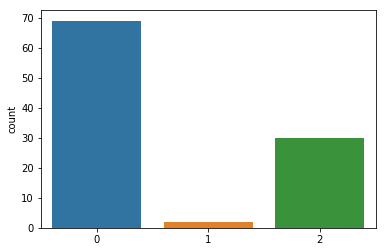

In [174]:
sns.countplot(x=y_pred)
plt.show()

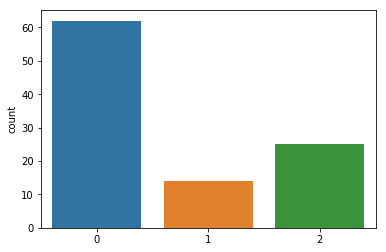

In [175]:
sns.countplot(x=y_test)
plt.show()

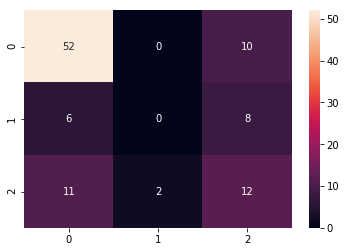

In [176]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

#plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

63.366336633663366

# logistic reg.

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logmodel=LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [180]:
y_pred2=logmodel.predict(X_test)

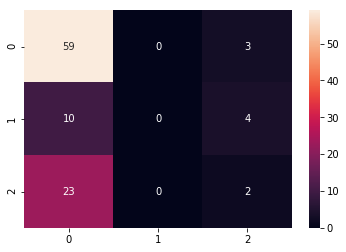

In [181]:
cm=confusion_matrix(y_test,y_pred2)

#plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [182]:
accuracy_score(y_test,y_pred2)*100

60.396039603960396

In [183]:
# from sklearn.metrics import log_loss
# # 0.Love
# # 1.Mythology & Folklore
# # 2.Nature
# log_loss(y_test,y_pred2,labels=[1,2,3])

# naive bayes

In [193]:
from sklearn.naive_bayes import GaussianNB

In [194]:
NBmodel=GaussianNB()



# making dense matrix
import scipy.sparse as sp
if(sp.issparse(X_train)==True):
    X_train_dense = X_train.todense()
    X_test_dense= X_test.todense()

In [197]:
NBmodel.fit(X_train_dense,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [200]:
y_pred3=NBmodel.predict(X_test_dense)

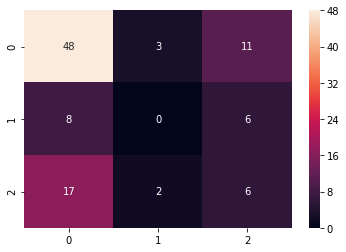

In [201]:
cm=confusion_matrix(y_test,y_pred3)

#plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [202]:
accuracy_score(y_test,y_pred3)*100

53.46534653465347

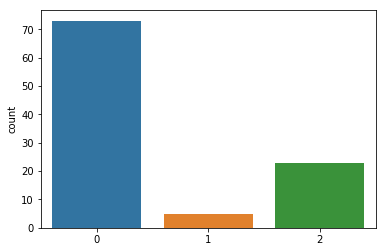

In [203]:
sns.countplot(x=y_pred3)
plt.show()

# SVM

In [204]:
from sklearn.svm import LinearSVC

In [205]:
model=LinearSVC()

In [206]:
model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [207]:
y_pred4=model.predict(X_test)

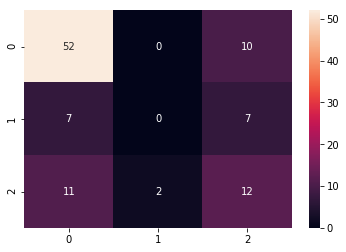

In [208]:
cm=confusion_matrix(y_test,y_pred4)

#plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [209]:
accuracy_score(y_test,y_pred4)*100

63.366336633663366

In [210]:
y_score = model.decision_function(X_test)
from sklearn.metrics import average_precision_score
y_test_svm=pd.get_dummies(y_test)
average_precision_score(y_test_svm,y_score)

0.44911426935422444

# Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rfmodel = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [213]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [214]:
y_pred5=rfmodel.predict(X_test)

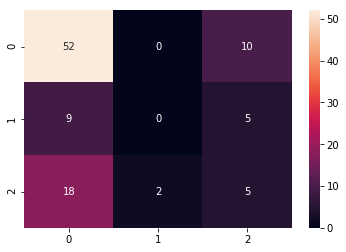

In [215]:
cm=confusion_matrix(y_test,y_pred5)

#plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [216]:
accuracy_score(y_test,y_pred5)*100

56.43564356435643